In [12]:
import numpy as np
import matplotlib.pyplot as plt
import sys, cv2

%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
sampling_frequency = 200
sampling_interval = 1/sampling_frequency

start = 0
end = 3

signal1_frequency = 7
signal2_frequency = 11

time = np.arange(start, end, sampling_interval)

In [4]:
def square_wave(time, frequency):
    sine = np.sin(2*np.pi*frequency*time)
    return np.sign(sine)

In [5]:
signal1 = np.sin(2*np.pi*signal1_frequency*time)
signal2 = np.sin(2*np.pi*signal2_frequency*time)
signal3 = square_wave(time, 9)
print(len(signal3))
signal = signal1 + signal2 + signal3

600


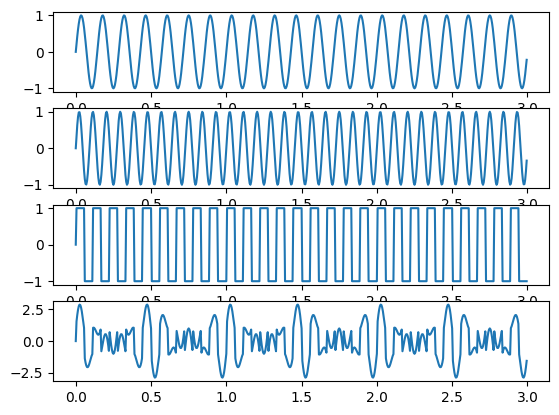

In [6]:
fig, axs = plt.subplots(4, 1)
axs[0].plot(time, signal1)
axs[1].plot(time, signal2)
axs[2].plot(time, signal3)
axs[3].plot(time, signal)

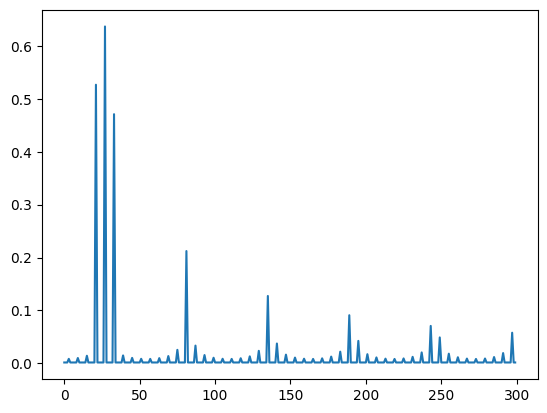

In [7]:
FT = np.fft.fft(signal)/len(signal)
FT = FT[range(int(len(signal)/2))]
plt.plot(abs(FT))

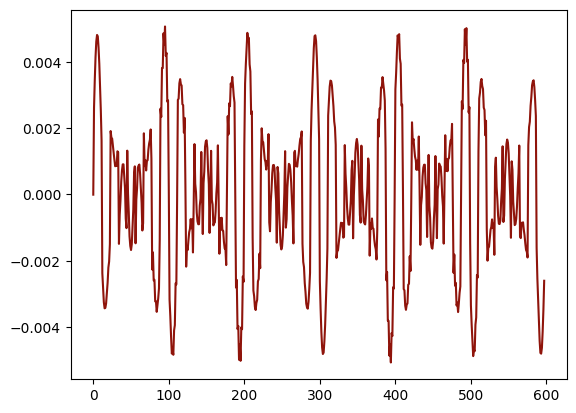

In [8]:
inverseFT = np.fft.irfft(FT)
plt.plot(inverseFT, color="#8f140b")

In [42]:
def create_circular_mask(h, w, center = None, radius = None):
    if not center: # use the middle of the image
        center = (int(w/2), int(h/2))
    if not radius: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
    mask = dist_from_center <= radius
    return mask

In [51]:
def fourierSeries2D(img, components):
    plot_size = 8
    fig, axs = plt.subplots(len(components), 1, figsize=(plot_size, 2*plot_size), sharex=True, sharey=True)

def get2DfourierTransform(img):
    ft = np.fft.ifftshift(img)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)
    return ft

def getInv2DfourierTransform(img):
    ift = np.fft.ifftshift(img)
    ift = np.fft.ifft2(ift)
    ift = np.fft.fftshift(ift)
    ift = ift.real
    return ift

def fourierSeries(signal, components, dimensions = 1):
    plot_size = 8
    fig, axs = plt.subplots(len(components), 1, figsize=(plot_size, 2*plot_size), sharex=True, sharey=True)

    j = 0
    for n in components:

        if dimensions == 1:
            colors = np.linspace(100, 255, n)
            for i in range(n):
                    fft = np.fft.rfft(signal)
                    np.put(fft, range(i+1, len(fft)), 0.0)
                    ifft = np.fft.irfft(fft)
                    axs[j].plot(ifft, color=plt.cm.Reds(int(colors[i])), alpha = .1, linewidth=0.5)

        elif dimensions == 2:
            radius = components[j]
            fft = np.fft.fft2(signal)
            fft = np.fft.fftshift(fft)
            h, w = signal.shape[:2]
            mask = create_circular_mask(h, w, radius = radius)
            masked_fft = fft.copy()
            fft[~mask] = 0
            # axs[j].imshow(np.log(np.abs(fft)))
            ifft = np.fft.ifft2(fft)
            axs[j].imshow(np.abs(ifft))

        else:
            raise Exception("Sorry, unsupported number of dimensions")

        if dimensions == 1:
            axs[j].plot(signal, color="#e6d8ae")
        j -=- 1

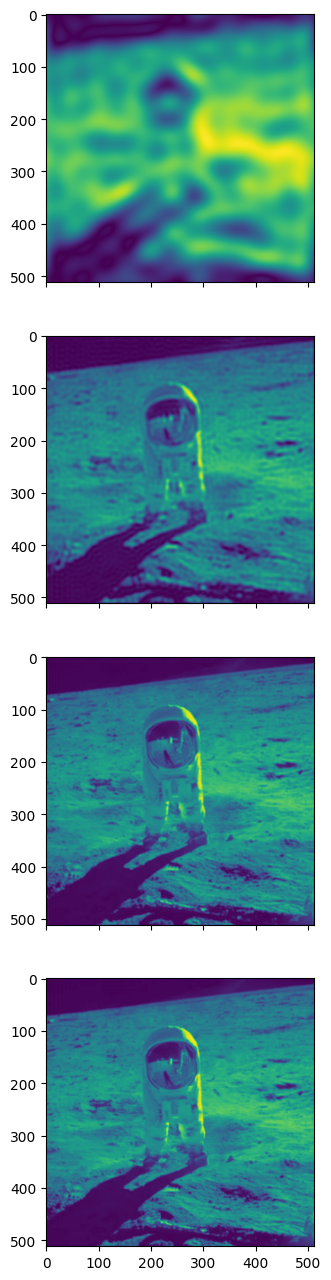

In [52]:

# binary_signal = square_wave(time, 1)
# fourierSeries(binary_signal, [10, 50, 100, 200])

img = cv2.imread('images/test.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fourierSeries(gray, [10, 50, 100, 200], dimensions=2)

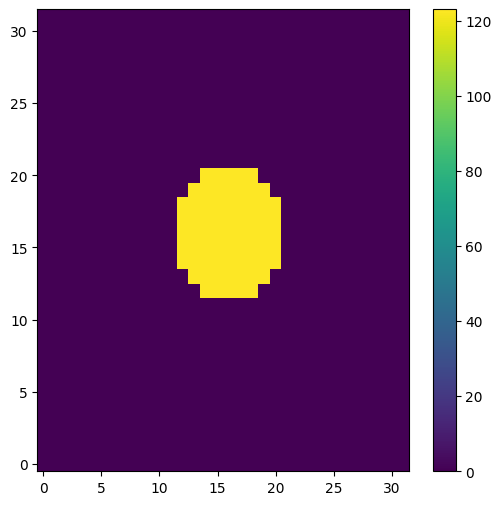